# Лабораторна робота 4.3

### b) Україномовні/мульти-мовні моделі через `pipeline`
- zero-shot-classification
- summarization
- translation

### c) Diffusers: Text-to-Image

## 1) Імпорт та перевірка середовища

In [1]:

import platform
import json
from pathlib import Path

import torch
import matplotlib.pyplot as plt

from transformers import pipeline, AutoTokenizer

print("Python:", platform.python_version())
print("Torch:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
device = 0 if torch.cuda.is_available() else -1
print("pipeline device:", device)

BASE_DIR = Path.cwd()
print("Working dir:", BASE_DIR.resolve())


/home/kali/Desktop/KPI/DATA_ANALYS/lab4/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Python: 3.13.9
Torch: 2.9.1+cu128
CUDA available: False
pipeline device: -1
Working dir: /home/kali/Desktop/KPI/DATA_ANALYS/lab4


# Частина b) Україномовні моделі (pipeline)
Результати збережемо у JSON файли поруч із ноутбуком.

## b1) Zero-shot classification (FIX)

In [2]:

tok = AutoTokenizer.from_pretrained("joeddav/xlm-roberta-large-xnli", use_fast=False)

zero_shot = pipeline(
    "zero-shot-classification",
    model="joeddav/xlm-roberta-large-xnli",
    tokenizer=tok,
    device=device
)

texts = [
    "Сьогодні Верховна Рада ухвалила новий законопроєкт щодо кібербезпеки.",
    "Матч завершився з рахунком 2:1, команда забила переможний гол на останній хвилині.",
    "Компанія представила новий смартфон із покращеною камерою та автономністю.",
    "Зловмисники розіслали фішингові листи, намагаючись викрасти паролі користувачів."
]
labels = ["політика", "спорт", "технології", "кібербезпека"]

zs_results = [zero_shot(t, candidate_labels=labels, multi_label=False) for t in texts]
print(zs_results[0])

out_path = BASE_DIR / "b_zero_shot_results.json"
out_path.write_text(json.dumps(zs_results, ensure_ascii=False, indent=2), encoding="utf-8")
print("✅ Saved:", out_path.resolve())


Some weights of the model checkpoint at joeddav/xlm-roberta-large-xnli were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


{'sequence': 'Сьогодні Верховна Рада ухвалила новий законопроєкт щодо кібербезпеки.', 'labels': ['кібербезпека', 'технології', 'політика', 'спорт'], 'scores': [0.829053521156311, 0.16535866260528564, 0.0048841992393136024, 0.0007035656599327922]}
✅ Saved: /home/kali/Desktop/KPI/DATA_ANALYS/lab4/b_zero_shot_results.json


## b2) Summarization (українське підсумовування)

In [3]:

summarizer = pipeline(
    "summarization",
    model="ukr-models/uk-summarizer",
    device=device
)

ua_text = (
    "Кібербезпека стала одним із ключових напрямів розвитку сучасних організацій. "
    "Зі зростанням кількості дистанційних працівників збільшується поверхня атаки, "
    "а фішинг та викрадення облікових даних залишаються найпоширенішими векторами. "
    "Щоб зменшити ризики, компаніям важливо впроваджувати багатофакторну автентифікацію, "
    "навчання персоналу, моніторинг подій безпеки та регулярні резервні копії."
)

sum_out = summarizer(ua_text, max_length=80, min_length=25, do_sample=False)
print(sum_out)

out_path = BASE_DIR / "b_summarization_results.json"
out_path.write_text(json.dumps(sum_out, ensure_ascii=False, indent=2), encoding="utf-8")
print("✅ Saved:", out_path.resolve())


Device set to use cpu
Both `max_new_tokens` (=256) and `max_length`(=80) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'summary_text': 'Кібербезпека стала одним із ключових напрямів розвитку сучасних організацій, щоб зменшити ризики викрадення облікових даних.'}]
✅ Saved: /home/kali/Desktop/KPI/DATA_ANALYS/lab4/b_summarization_results.json


## b3) Translation (EN → UK)

In [4]:

translator = pipeline(
    "translation",
    model="Helsinki-NLP/opus-mt-en-uk",
    device=device
)

en_sents = [
    "Cybersecurity is important for modern organizations.",
    "Please open the window.",
    "Where is the nearest train station?"
]

tr_out = translator(en_sents, max_length=80)
for s, o in zip(en_sents, tr_out):
    print("EN:", s)
    print("UK:", o["translation_text"])
    print("-"*50)

out_path = BASE_DIR / "b_translation_results.json"
out_path.write_text(json.dumps(tr_out, ensure_ascii=False, indent=2), encoding="utf-8")
print("✅ Saved:", out_path.resolve())


/home/kali/Desktop/KPI/DATA_ANALYS/lab4/venv/lib/python3.13/site-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu


EN: Cybersecurity is important for modern organizations.
UK: Кібербезпеки важливі для сучасних організацій.
--------------------------------------------------
EN: Please open the window.
UK: Будь ласка, відчиніть вікно.
--------------------------------------------------
EN: Where is the nearest train station?
UK: Де найближча залізнична станція?
--------------------------------------------------
✅ Saved: /home/kali/Desktop/KPI/DATA_ANALYS/lab4/b_translation_results.json


# Частина c) Diffusers: Text-to-Image (FIX для CPU)

Результат збережеться у `c_t2i_result.png` і параметри у `c_t2i_meta.json`.

/home/kali/Desktop/KPI/DATA_ANALYS/lab4/venv/lib/python3.13/site-packages/torch/amp/autocast_mode.py:270: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
Loading pipeline components...:   0%|                                                                  | 0/7 [00:00<?, ?it/s]An error occurred while trying to fetch /home/kali/.cache/huggingface/hub/models--hf-internal-testing--tiny-stable-diffusion-pipe/snapshots/3ee6c9f225f088ad5d35b624b6514b091e6a4849/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /home/kali/.cache/huggingface/hub/models--hf-internal-testing--tiny-stable-diffusion-pipe/snapshots/3ee6c9f225f088ad5d35b624b6514b091e6a4849/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /home/kali/.cache/huggingface/hub/models--hf-internal-testing--tiny-stable-diffusion-pipe/snapshots/3ee6c9f225f088ad5d35b624b6514

MODEL_ID: hf-internal-testing/tiny-stable-diffusion-pipe


100%|██████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 12.56it/s]


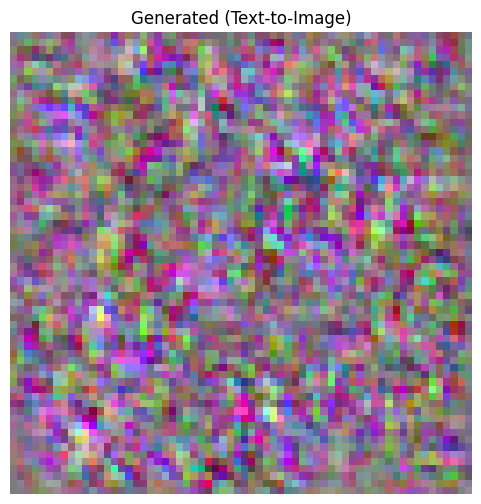

✅ Saved: /home/kali/Desktop/KPI/DATA_ANALYS/lab4/c_t2i_result.png
✅ Saved: /home/kali/Desktop/KPI/DATA_ANALYS/lab4/c_t2i_meta.json


In [5]:

from diffusers import DiffusionPipeline

USE_GPU = torch.cuda.is_available()

if USE_GPU:
    MODEL_ID = "stabilityai/sd-turbo"
    pipe = DiffusionPipeline.from_pretrained(MODEL_ID, torch_dtype=torch.float16, variant="fp16")
    pipe = pipe.to("cuda")
    pipe.enable_attention_slicing()
    num_steps = 4
    guidance = 0.0
else:
    MODEL_ID = "hf-internal-testing/tiny-stable-diffusion-pipe"
    pipe = DiffusionPipeline.from_pretrained(MODEL_ID)  # CPU
    pipe = pipe.to("cpu")

    if hasattr(pipe, "safety_checker"):
        pipe.safety_checker = None
    if hasattr(pipe, "requires_safety_checker"):
        pipe.requires_safety_checker = False

    num_steps = 2
    guidance = 7.0

print("MODEL_ID:", MODEL_ID)

prompt = "Cyberpunk Kyiv at night, neon lights, rain, cinematic"
seed = 42
generator = torch.Generator(device="cuda" if USE_GPU else "cpu").manual_seed(seed)

image = pipe(
    prompt=prompt,
    num_inference_steps=num_steps,
    guidance_scale=guidance,
    generator=generator
).images[0]

plt.figure(figsize=(6,6))
plt.imshow(image)
plt.axis("off")
plt.title("Generated (Text-to-Image)")
plt.show()

out_img_path = BASE_DIR / "c_t2i_result.png"
image.save(out_img_path)
print("✅ Saved:", out_img_path.resolve())

meta = {
    "model_id": MODEL_ID,
    "prompt": prompt,
    "seed": seed,
    "num_inference_steps": num_steps,
    "guidance_scale": guidance,
    "use_gpu": USE_GPU
}
out_meta_path = BASE_DIR / "c_t2i_meta.json"
out_meta_path.write_text(json.dumps(meta, ensure_ascii=False, indent=2), encoding="utf-8")
print("✅ Saved:", out_meta_path.resolve())


## Висновки
- b) Продемонстровано 3 задачі через `pipeline` і збережено результати у JSON.
- c) Згенеровано зображення через Diffusers та збережено PNG + метадані.
